<a href="https://colab.research.google.com/github/naokityokoyama/autoML/blob/main/AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Feed Forward with Keras

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

from keras.callbacks import EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils 
from sklearn.metrics import confusion_matrix


In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target
y_dummy = np_utils.to_categorical(y.tolist())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dummy , test_size=0.25, stratify=y_dummy)

In [ ]:
classificador = Sequential()
classificador.add(Dense(units=10, activation='relu', input_dim=4))
classificador.add(Dropout(0.1))
classificador.add(Dense(units=10, activation='relu'))
classificador.add(Dense(units=3, activation='softmax'))
early_stopping = EarlyStopping(monitor='loss', patience=3)

classificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
classificador.fit(X_train,y_train, epochs=100, batch_size=10, callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 1.2060 - accuracy: 0.3393
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1381 - accuracy: 0.3661
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1190 - accuracy: 0.2946
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0535 - accuracy: 0.3393
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0289 - accuracy: 0.3304
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0224 - accuracy: 0.2946
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0049 - accuracy: 0.3482
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9957 - accuracy: 0.3214
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9641 - accuracy: 0.3839
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9616 - accuracy: 0.5179
Epoch 11/

In [ ]:
loss, accuracy = classificador.evaluate(X_test, y_test)
print ('loss:', loss, 'accuracy:' ,accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.9474
loss: 0.4807312488555908 accuracy: 0.9473684430122375


In [ ]:
y_pred = classificador.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.round().argmax(axis=1))

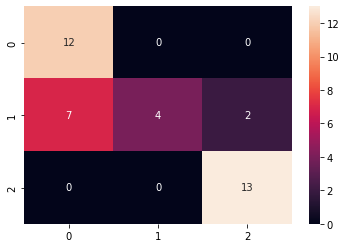

In [ ]:
sns.heatmap(cm, annot=True);

### AutoKeras

https://autokeras.com/structured_data_classifier/

In [ ]:
import warnings
warnings.filterwarnings("ignore")
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 26.0 MB/s 
     |████████████████████████████████| 133 kB 51.7 MB/s 


In [ ]:
import autokeras as ak

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, stratify=y)

In [ ]:
modelo = ak.StructuredDataClassifier(max_trials=5)
modelo.fit(X_train, y_train, epochs=10)

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.5

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0970 - accuracy: 0.6696
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0118 - accuracy: 0.6696
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9665 - accuracy: 0.6696
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9370 - accuracy: 0.6696
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9115 - accuracy: 0.6786
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8871 - accuracy: 0.6696
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.6696
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.8396 - accuracy: 0.6696
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.8174 - acc

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.6115 - accuracy: 0.8947


[0.6114687323570251, 0.8947368264198303]

In [ ]:
y_pred_auto = modelo.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred_auto.astype(np.int))

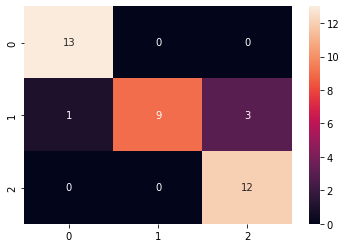

In [ ]:
sns.heatmap(cm , annot=True)